
# Data Quality Assessment of an Airport Database for Argentina

## 1. Introduction

In the aviation industry, data quality plays a crucial role where accuracy and reliability directly impact safety, operational efficiency, and strategic planning. This report aims to assess the data quality of an airports and heliports database in Argentina, focusing on key factors such as geographic accuracy, completeness, and data consistency.

## 2. Dataset Description

The dataset under evaluation is open-source and contains information on airports and heliports in Argentina. The fields included are:

* Airport name
* IATA/ICAO code
* Geographic latitude and longitude
* Elevation
* Operational status

In [1]:
#Libraries needed for the project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp
import geopandas as gpd
from shapely.geometry import Point
import warnings
import os as os

warnings.filterwarnings('ignore')

## 3. Methodology

To evaluate data quality, the following steps will be taken:

1. **Data Loading and Exploration:**
   - Load the dataset into the analysis environment.
   - Perform an initial exploration to understand the structure and content of the data.

2. **Data Quality Assessment:**
   - **Completeness:** Identify and address missing or null values.
   - **Uniqueness:** Check for the presence of duplicate records in the database.
   - **Accuracy:** Verify the correctness of the data through cross-validation with external sources, if possible.
   - **Consistency:** Ensure that the data is coherent throughout the dataset. This includes checking for values that do not follow the expected format or are contradictory.
   - **Validity:** We validated the values within the dataset to ensure they fall within expected ranges and adhere to predefined formats. This helps in maintaining the accuracy and reliability of the data.

3. **Results Analysis:**
   - Analyze the data quality metrics obtained and create visualizations to clearly represent the findings.
   - Identify patterns and areas that need improvement.

4. **Recommendations:**
   - Propose solutions to enhance data quality based on identified issues. This may include suggestions for data cleaning, validation processes, and better data management practices.


### 1. Data Loading and Exploration

From here, I will provide a view of the most basic information about the dataset. This will include an overview of the structure and content of the data, such as column names, data types, and basic summary statistics.

To gain a clearer perspective, we will now take a look at the first five records in the dataset. This will help us observe how the data is structured and provide a quick reference to the kind of information contained in each field.

In [2]:
# Import the database as a df
os.getcwd()
airports = pd.read_csv('airports.csv')

# Select the relevant columns for the assessment
airports = airports[['id', 'type', 'name','iso_country', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'gps_code']]

# Filter the database in order to select only airports/helipads from Argentina

airports = airports[airports['iso_country'] == 'AR']

# Display the first few rows of the dataset
airports.head()


,id,type,name,iso_country,latitude_deg,longitude_deg,elevation_ft,gps_code
11695,35333,small_airport,Cullen Airport,AR,-52.885740,-68.414956,132.0,NaN
11696,35334,small_airport,Estancia Los Cerros Airport,AR,-54.343000,-67.837532,1914.0,NaN
11697,35335,small_airport,Rio Bellavista Airport,AR,-53.982700,-68.523598,201.0,NaN
11698,35398,small_airport,Merlo Airport,AR,-32.358200,-65.017403,796.0,NaN
11699,35399,small_airport,Bragado Airport,AR,-35.145811,-60.480294,196.0,SA2X


In the following output, we can observe the basic structure of the DataFrame. It consists of 942 entries and 8 columns. Here's a breakdown of the columns:

* id: A unique identifier for each entry, with no missing values.
* type: The type of airport, represented as a string, with no missing values.
* name: The name of the airport, represented as a string, with no missing values.
* iso_country: The country code in ISO format, with no missing values.
* latitude_deg: The latitude coordinate of the airport, represented as a float, with no missing values.
* longitude_deg: The longitude coordinate of the airport, represented as a float, with no missing values.
* elevation_ft: The elevation of the airport in feet, with some missing values (34 entries).
* gps_code: The GPS code of the airport, which has a significant number of missing values (only 225 non-null entries).

The column data types range from integers and floats to strings (object), and we can immediately see that some columns, such as elevation_ft and gps_code, contain missing data, which will be important to address in further data quality checks.

In [3]:
# Display basic information about the dataset
airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 11695 to 56103
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             942 non-null    int64  
 1   type           942 non-null    object 
 2   name           942 non-null    object 
 3   iso_country    942 non-null    object 
 4   latitude_deg   942 non-null    float64
 5   longitude_deg  942 non-null    float64
 6   elevation_ft   908 non-null    float64
 7   gps_code       225 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 66.2+ KB


In the following summary statistics for the latitude_deg, longitude_deg, and elevation_ft columns, we can assess whether the values are sensible within the context of airports and helipads:

* Latitude and Longitude: The latitude values range from approximately -54.84 to -22.12, and the longitude values range from -72.89 to -53.67. These coordinates fall within the geographical boundaries of Argentina, indicating that the recorded locations are plausible.

* Elevation: The elevation values show a minimum of 6 feet and a maximum of 13,000 feet. While the minimum value is acceptable for small airports and helipads, the maximum value of 13,000 feet raises a flag. It is unusually high for typical airport elevations, suggesting a potential data entry error or the inclusion of non-standard data.

Overall, the statistics indicate that the latitude and longitude values are reasonable, while the elevation values warrant further investigation to confirm their accuracy.

In [4]:
# Get summary statistics for numerical columns
summary_stats = airports[['latitude_deg', 'longitude_deg', 'elevation_ft']].describe()
summary_stats

,latitude_deg,longitude_deg,elevation_ft
count,942.000000,942.000000,908.000000
mean,-35.390905,-62.908536,801.696035
std,6.671947,4.095665,1296.457558
min,-54.843300,-72.885820,6.000000
25%,-38.005901,-65.493250,131.750000
50%,-34.444700,-62.180665,316.000000
75%,-31.508499,-59.450899,903.000000
max,-22.123510,-53.673332,13000.000000


### 2. Data Quality Assessment

#### Data Completeness

In this section, we will explore the various dimensions of the data quality assessment, starting with data completeness. As previously noted in the overview of the dataset, we have identified missing values in the elevation_ft and gps_code columns. This analysis highlights the importance of ensuring that all required information is present for accurate and reliable data usage.

In [5]:
# Identify Null or Missing Values

# Check for missing values in each column
airports.isnull().sum()


id                 0
type               0
name               0
iso_country        0
latitude_deg       0
longitude_deg      0
elevation_ft      34
gps_code         717
dtype: int64

### Data Accuracy

To ensure the accuracy of the data, I undertook the following steps:

1. **Visualization and Preliminary Check**: I plotted the data on various maps to visually inspect its consistency and ensure it aligns with known geographical and contextual information. This visual inspection helps identify any obvious discrepancies or anomalies in the dataset.

2. **Cross-Verification**: The next step involves verifying the data with additional sources. This includes comparing the dataset against other reliable datasets or authoritative sources to confirm its accuracy and consistency.

By using these methods, I aim to enhance the reliability of the data and ensure that any potential issues are identified and addressed.


**Visualization and Preliminary Check**

During the preliminary visual inspection, it appears that some points are located in the sea. We will further investigate these anomalies to confirm their accuracy


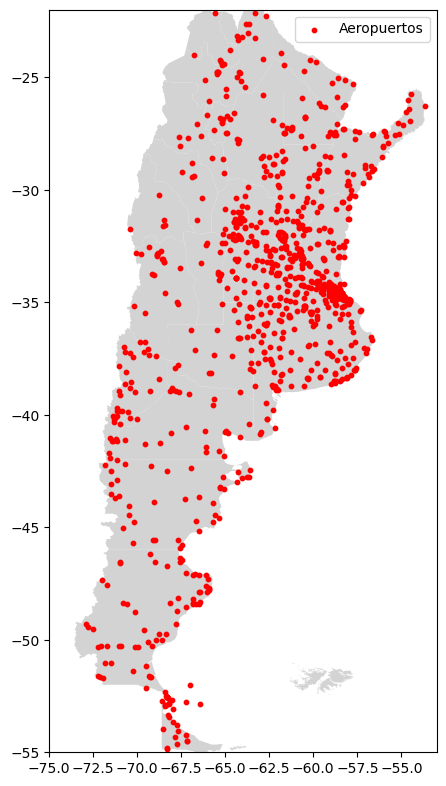

In [6]:
# Cargar el archivo shapefile de Argentina
map_argentina = gpd.read_file('Mapa_Argentina_Bicontinental_QGIS/datos_shp/Provincias.shp')

# Crear una geometría de puntos a partir de las columnas de latitud y longitud del dataframe 'airports'
geometry = [Point(xy) for xy in zip(airports['longitude_deg'], airports['latitude_deg'])]

# Convertir el dataframe 'airports' en un GeoDataFrame
airports_gdf = gpd.GeoDataFrame(airports, geometry=geometry, crs="EPSG:4326")

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(5, 10))

# Ploteo del mapa de Argentina
map_argentina.plot(ax=ax, color='lightgray')

# Superponer los puntos de los aeropuertos
airports_gdf.plot(ax=ax, color='red', markersize=10, label="Aeropuertos")

# Establecer los límites de la vista (zoom) - Limitar el área a las coordenadas de Argentina continental
ax.set_xlim([-75, -53])  # Limitar la longitud
ax.set_ylim([-55, -22])  # Limitar la latitud

# Mostrar el mapa con los puntos
plt.legend()
plt.show()

Next, we will examine a list of airports and helipads that appear to be located not on land but over bodies of water. This discrepancy raises questions about the accuracy of their geographical data.

In [7]:
# Cargar el archivo shapefile de cuerpos de agua
water_bodies = gpd.read_file('10m_physical/ne_10m_ocean.shp')

# Reproyectar water_bodies al CRS EPSG:4326
water_bodies = water_bodies.to_crs(epsg=4326)

# Realizar la unión espacial para verificar si los aeropuertos están dentro de cuerpos de agua
airports_in_water = gpd.sjoin(airports_gdf, water_bodies, how='left', predicate='intersects')


# Filtrar los aeropuertos que están en el mar
airports_in_water = airports_in_water[airports_in_water['index_right'].notnull()]

# Extraer los aeropuertos que no están en el mar
airports_not_in_water = airports_gdf[~airports_gdf.index.isin(airports_in_water.index)]

# Filtrar los aeropuertos que están en el mar
airports_in_water = airports_in_water[airports_in_water['index_right'].notnull()]

airports_in_water.reset_index()

,index,id,type,name,iso_country,latitude_deg,longitude_deg,elevation_ft,gps_code,geometry,index_right,featurecla,scalerank,min_zoom
0,11740,38721,heliport,Aries Heliport,AR,-52.683100,-68.041900,NaN,NaN,POINT (-68.0419 -52.6831),0.0,Ocean,0.0,0.0
1,11800,38781,heliport,Club Nautico San Isidro Heliport,AR,-34.461400,-58.500300,6.0,NaN,POINT (-58.5003 -34.4614),0.0,Ocean,0.0,0.0
2,11880,38861,heliport,Heliplataforma Am I Heliport,AR,-52.519200,-68.385800,98.0,NaN,POINT (-68.3858 -52.5192),0.0,Ocean,0.0,0.0
3,11881,38862,heliport,Heliplataforma Carina/Total Fina ELF,AR,-52.757200,-67.219400,30.0,NaN,POINT (-67.2194 -52.7572),0.0,Ocean,0.0,0.0
4,11882,38863,heliport,Heliplataforma/Am-2 Heliport,AR,-52.548900,-68.312500,134.0,NaN,POINT (-68.3125 -52.5489),0.0,Ocean,0.0,0.0
5,11883,38864,heliport,Heliplataforma/Am3 Heliport,AR,-52.522800,-68.280800,134.0,NaN,POINT (-68.2808 -52.5228),0.0,Ocean,0.0,0.0
6,11884,38865,heliport,Heliplataforma/Am5 Heliport,AR,-52.570600,-68.253300,98.0,NaN,POINT (-68.2533 -52.5706),0.0,Ocean,0.0,0.0
7,11885,38866,heliport,Heliplataforma/Rio Cullen-Hidra Norte Heliport,AR,-52.820600,-68.219200,65.0,NaN,POINT (-68.2192 -52.8206),0.0,Ocean,0.0,0.0
8,12168,42896,heliport,Heliplataforma Barcaza Yagana Heliport,AR,-52.522500,-68.280600,49.0,NaN,POINT (-68.2806 -52.5225),0.0,Ocean,0.0,0.0
9,12169,42897,heliport,Heliplataforma Buque Skandi Patagonia Heliport,AR,-52.000000,-67.000000,NaN,NaN,POINT (-67 -52),0.0,Ocean,0.0,0.0


**Cross-verification**

In the cross-verification section, I will compare the data with a scraped database from MADHEL, sourced from the Argentine National Authority.

We will now take a look at the first five records in the dataset

## 4. Conclusions

Summarize the key findings and highlight critical areas needing improvement. Also, discuss the impact of data quality on the use of the database for real-world applications.

## 5. Future Improvements

Propose ideas for future analyses or improvements in the data quality process, including potential approaches for additional data or advanced techniques that could be applied.

In [34]:
print(airports_gdf.crs)


EPSG:4326


In [35]:
print(water_bodies.crs)

EPSG:4326
